<a href="https://colab.research.google.com/github/Viethoang0803/ph-n-t-ch-d-li-u-v-i-py/blob/main/w12_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv')

In [28]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [29]:
df.tail()

,Date,Births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [31]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [7]:
time_series = df['Births']

In [8]:
# Train-test split
train_size = int(len(time_series) * 0.75)
train, test = time_series.iloc[:train_size], time_series.iloc[train_size:]

In [9]:
# Function to fit ARIMA model
def fit_arima(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    pred = model_fit.forecast(steps=len(test))[0]
                    mse = mean_squared_error(test, pred)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print('Best ARIMA %s MSE=%.3f' % (best_cfg, best_score))

In [10]:

# Fit ARIMA model
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
fit_arima(train, test, p_values, d_values, q_values)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.p

Best ARIMA None MSE=inf


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
# Function to fit AR model
def fit_ar(train, test, p_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        try:
            model = AutoReg(train, lags=p)
            model_fit = model.fit()
            pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
            mse = mean_squared_error(test, pred)
            if mse < best_score:
                best_score, best_cfg = mse, p
        except:
            continue
    print('Best AR %s MSE=%.3f' % (best_cfg, best_score))

In [33]:

# Fit AR model
p_values = range(1, 6)
fit_ar(train, test, p_values)


Best AR 5 MSE=44.207


In [34]:
# Function to fit MA model
def fit_ma(train, test, q_values):
    best_score, best_cfg = float("inf"), None
    for q in q_values:
        try:
            model = ARMA(train, order=(0, q))
            model_fit = model.fit(disp=False)
            pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
            mse = mean_squared_error(test, pred)
            if mse < best_score:
                best_score, best_cfg = mse, q
        except:
            continue
    print('Best MA %s MSE=%.3f' % (best_cfg, best_score))

In [35]:
# Fit MA model
q_values = range(1, 6)
fit_ma(train, test, q_values)

Best MA None MSE=inf


In [36]:
# Function to fit ARMA model
def fit_arma(train, test, p_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for q in q_values:
            try:
                model = ARMA(train, order=(p, q))
                model_fit = model.fit(disp=False)
                pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
                mse = mean_squared_error(test, pred)
                if mse < best_score:
                    best_score, best_cfg = mse, (p, q)
            except:
                continue
    print('Best ARMA %s MSE=%.3f' % (best_cfg, best_score))

In [37]:

# Fit ARMA model
p_values = range(1, 6)
q_values = range(1, 6)
fit_arma(train, test, p_values, q_values)

Best ARMA None MSE=inf


In [38]:

# Function to plot time series and predictions
def plot_predictions(train, test, pred):
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, pred, label='Predictions')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


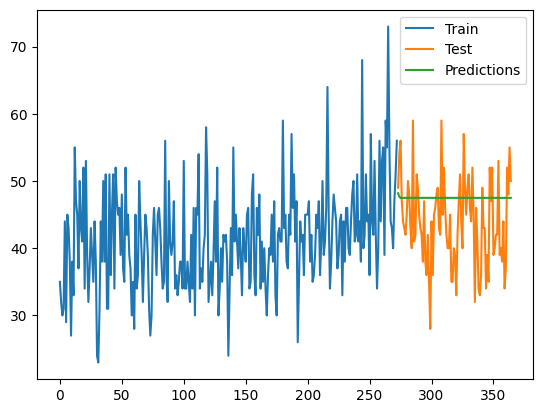

In [39]:
# Plot ARIMA predictions
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
start_index = len(train)
end_idx = len(train) + len(test) - 1
pred_arima = model_fit.predict(start=start_index, end=end_idx, typ='levels')
plot_predictions(train, test, pred_arima)


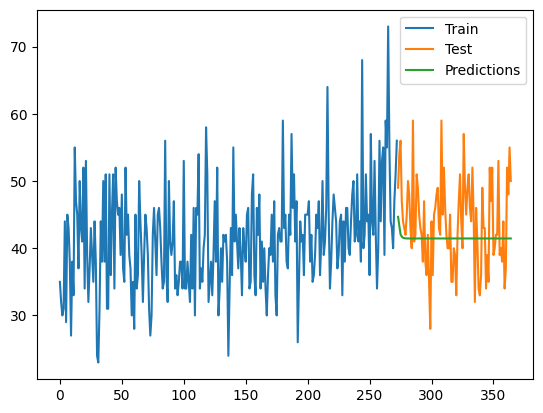

In [40]:

# Plot AR predictions
model = AutoReg(train, lags=2)
model_fit = model.fit()
pred_ar = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
plot_predictions(train, test, pred_ar)



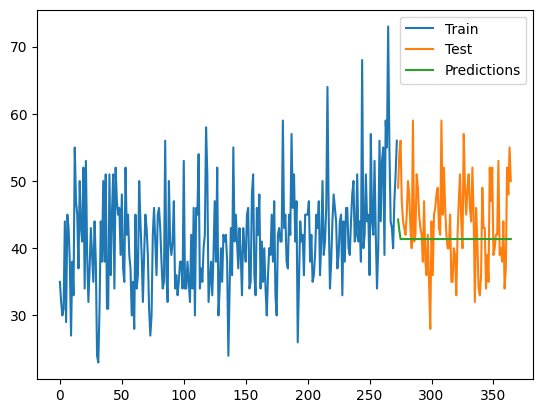

In [41]:

# Plot MA predictions
model = ARIMA(train, order=(0, 0, 2))
model_fit = model.fit()
pred_ma = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
plot_predictions(train, test, pred_ma)


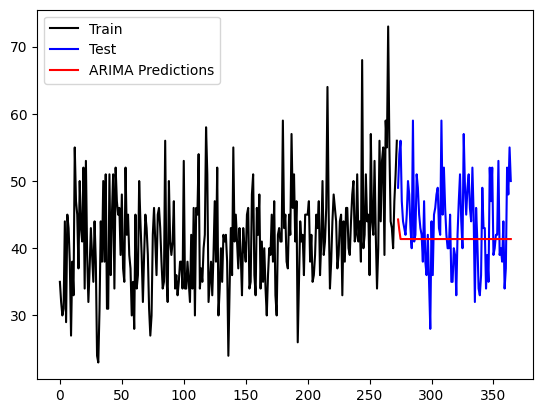

In [42]:

def plot_predictions(train, test, predictions, color='blue'):
    plt.plot(train, label='Train', color='black')
    plt.plot(test, label='Test', color='blue')
    plt.plot(predictions, label='ARIMA Predictions', color=color)
    plt.legend()
    plt.show()

# Plot ARMA predictions with a different color (e.g., red)
model = ARIMA(train, order=(0, 0, 2))
model_fit = model.fit()
pred_arma = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
plot_predictions(train, test, pred_arma, color='red')

In [43]:
import seaborn as sns

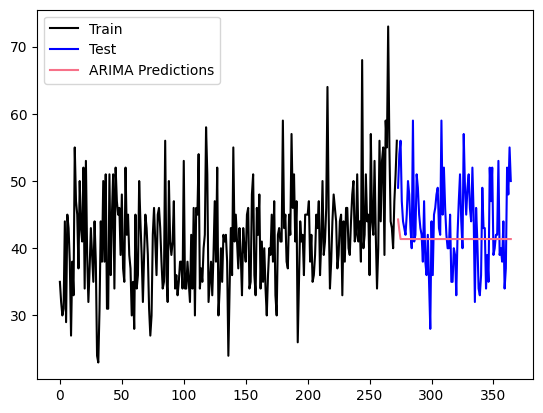

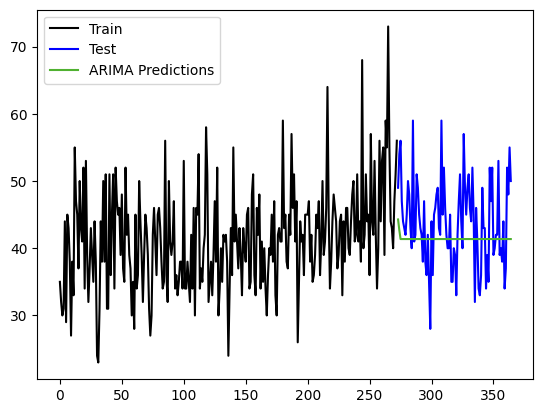

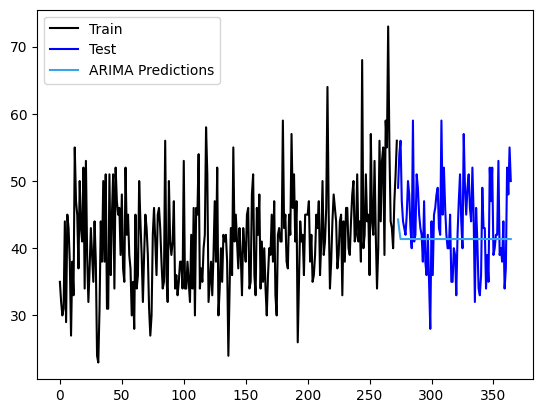

In [44]:

def plot_predictions(train, test, predictions, color='blue'):
    plt.plot(train, label='Train', color='black')
    plt.plot(test, label='Test', color='blue')
    plt.plot(predictions, label='ARIMA Predictions', color=color)
    plt.legend()
    plt.show()

# Set up a seaborn color palette
colors = sns.color_palette("husl", 3)  # You can change the number to get more or fewer colors

# Loop through the colors and plot predictions
for i, color in enumerate(colors):
    model = ARIMA(train, order=(0, 0, 2))
    model_fit = model.fit()
    pred_arma = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
    plot_predictions(train, test, pred_arma, color=color)